#Tutorial 6, Example 3b

Similar to example 3a but this time we use decay parameter and momentum term for our optimizer

In [1]:
import os
import pylab
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Check the version of PyTorch
print(torch.__version__)

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

2.0.1+cu118
creating the figures folder


In [2]:
# Load and prepare the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128)

100%|██████████| 9912422/9912422 [00:00<00:00, 242637606.55it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31293126.80it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 68652941.79it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23461242.33it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Build Model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv = nn.Conv2d(1, 25, 9, padding=0)
        self.pool = nn.MaxPool2d(4, 4)
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(25 * 5 * 5, 10)

    def forward(self, x):
        conv = F.relu(self.conv(x))
        pool = self.pool(conv)
        flatten = self.flatten(pool)
        out = F.softmax(self.dense(flatten), dim=1)
        return conv, pool, out

model = MyModel()

# Choosing Optimizer and Loss Function

For training the neural network, both a loss function (or criterion) and an optimizer are essential components. Here's a breakdown of the choices made:

## Loss Function (`criterion`)

- **CrossEntropyLoss (`nn.CrossEntropyLoss()`)**:
    - This is a commonly used loss function for classification tasks.
    - It's suitable for multi-class classification problems.
    - The output of the model is expected to be raw scores (logits) for each class, and `CrossEntropyLoss` internally computes the softmax of these scores to get probabilities.

## Optimizer (`optimizer`)

- **Stochastic Gradient Descent (SGD) (`optim.SGD`)**:
    - One of the most popular optimization algorithms.
    - Parameters:
        - **model.parameters()**: All the trainable parameters of the model.
        - **lr=1e-3**: Learning rate, which determines the step size during optimization. A smaller value means slower convergence but potentially more accurate results.
        - **momentum=0.5**: Helps accelerate gradients vectors in the right directions, leading to faster converging. It's a value between 0 (no momentum) and 1.
        - **weight_decay=1e-6**: Regularization term. It adds a penalty to the loss to prevent overfitting. The penalty is based on the magnitude of the weights (L2 penalty).

By choosing the `CrossEntropyLoss` and the SGD optimizer with the specified parameters, the model will be trained to minimize the classification error while ensuring smooth convergence and some degree of regularization.


In [4]:
# Choose an optimizer and loss function for training
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.5, weight_decay=1e-6)

In [5]:
# Main function: train and test the model
EPOCHS = 50
test_acc = []
print('Training...')
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        _, _, output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    train_accuracy = 100. * correct / len(train_loader.dataset)

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            _, _, output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = 100. * correct / len(test_loader.dataset)
    test_acc.append(test_accuracy)
    print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')

Training...
Epoch 1, Loss: 2.2954, Accuracy: 9.89%, Test Loss: 2.2831, Test Accuracy: 9.87%
Epoch 2, Loss: 2.2678, Accuracy: 12.71%, Test Loss: 2.2512, Test Accuracy: 22.87%
Epoch 3, Loss: 2.2277, Accuracy: 32.76%, Test Loss: 2.1970, Test Accuracy: 36.10%
Epoch 4, Loss: 2.1610, Accuracy: 40.45%, Test Loss: 2.1205, Test Accuracy: 45.08%
Epoch 5, Loss: 2.0871, Accuracy: 46.77%, Test Loss: 2.0525, Test Accuracy: 47.48%
Epoch 6, Loss: 2.0212, Accuracy: 53.39%, Test Loss: 1.9868, Test Accuracy: 56.68%
Epoch 7, Loss: 1.9651, Accuracy: 57.28%, Test Loss: 1.9413, Test Accuracy: 57.67%
Epoch 8, Loss: 1.9201, Accuracy: 61.84%, Test Loss: 1.8963, Test Accuracy: 64.53%
Epoch 9, Loss: 1.8788, Accuracy: 66.19%, Test Loss: 1.8511, Test Accuracy: 70.29%
Epoch 10, Loss: 1.8330, Accuracy: 72.30%, Test Loss: 1.8097, Test Accuracy: 73.49%
Epoch 11, Loss: 1.8010, Accuracy: 73.46%, Test Loss: 1.7846, Test Accuracy: 74.34%
Epoch 12, Loss: 1.7806, Accuracy: 73.99%, Test Loss: 1.7680, Test Accuracy: 74.69%
Epo

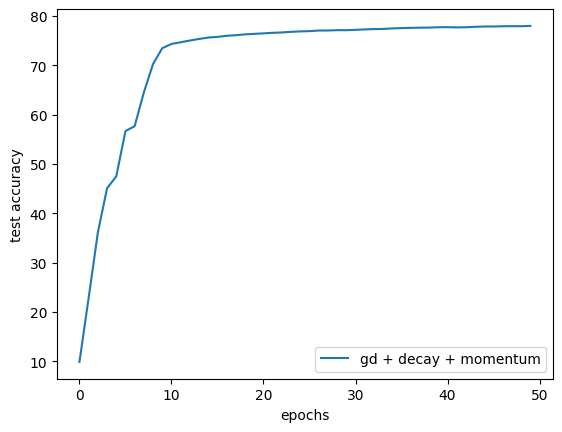

In [6]:
# Plotting test accuracy
plt.figure()
plt.plot(np.arange(EPOCHS), test_acc, label='gd + decay + momentum')
plt.xlabel('epochs')
plt.ylabel('test accuracy')
plt.legend(loc='lower right')
plt.savefig('./figures/t6q3_6.png')